# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откроем и изучим файл

В данном разделе откроем файл, и посмотрим, есть ли в нем какие-то ошибки, пропуски.

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# прочитаем файл
data = pd.read_csv('....csv')

In [3]:
# выведем на экран первые 10 строк файла
display(data.head(10))

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
# получим общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


В представленном датасете следующие колонки:
- calls - количество звонков (формат - float64)
- minutes - суммарная длительность звонков в минутах (формат - float64)
- messages - количество sms-сообщений (формат - float64)
- mb_used - израсходованный интернет-трафик в Мб (формат - float64)
- us_ultra - каким тарифом пользовался в течение месяца ("Ультра" - 1, "Смарт" - 0) (формат - int64)

In [5]:
# посмотрим название столбцов
print(data.columns)

Index(['calls', 'minutes', 'messages', 'mb_used', 'is_ultra'], dtype='object')


In [6]:
# определим размер датасета
print(data.shape[0])

3214


Посмотрмм каждый столбец для определения наличия аномальных значений

In [7]:
# столбец calls
print(data['calls'].describe())

count    3214.000000
mean       63.038892
std        33.236368
min         0.000000
25%        40.000000
50%        62.000000
75%        82.000000
max       244.000000
Name: calls, dtype: float64


In [8]:
# столбец minutes
print(data['minutes'].describe())

count    3214.000000
mean      438.208787
std       234.569872
min         0.000000
25%       274.575000
50%       430.600000
75%       571.927500
max      1632.060000
Name: minutes, dtype: float64


In [9]:
# столбец messages
print(data['messages'].describe())

count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages, dtype: float64


In [10]:
# столбец mb_used
print(data['mb_used'].describe())

count     3214.000000
mean     17207.673836
std       7570.968246
min          0.000000
25%      12491.902500
50%      16943.235000
75%      21424.700000
max      49745.730000
Name: mb_used, dtype: float64


In [11]:
# столбец is_ultra
print(data['is_ultra'].value_counts())

0    2229
1     985
Name: is_ultra, dtype: int64


В ходе исследования и изучения файла ошибок выявлено не было, но в некоторых столбцах, например, calls, minutes, messages формат данных нужно заменить с float на int. Заменим форматы в данных столбцах.

In [12]:
list_columns = ['calls', 'minutes', 'messages']
for name in list_columns:
    data[name] = data[name].astype('int64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null int64
minutes     3214 non-null int64
messages    3214 non-null int64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(1), int64(4)
memory usage: 125.7 KB


**Вывод:** в ходе изучения файла было получено следующее:

1) 5 колонок и 3214 строк:
   - calls - количество звонков
   - minutes - суммарная длительность звонков в минутах
   - messages - количество sms-сообщений
   - mb_used - израсходованный интернет-трафик в Мб
   - us_ultra - каким тарифом пользовался в течение месяца
   
2) в данных не было ошибок и пропусков, большиз разбросов или выбивающихся значений нет
3) в трех столбцах calls, minutes, messages поменяли тип данных с вещественного на целочисленный, так как в указанных колонках по условию данные округляются, и поэтому они не могут быть вещественными.

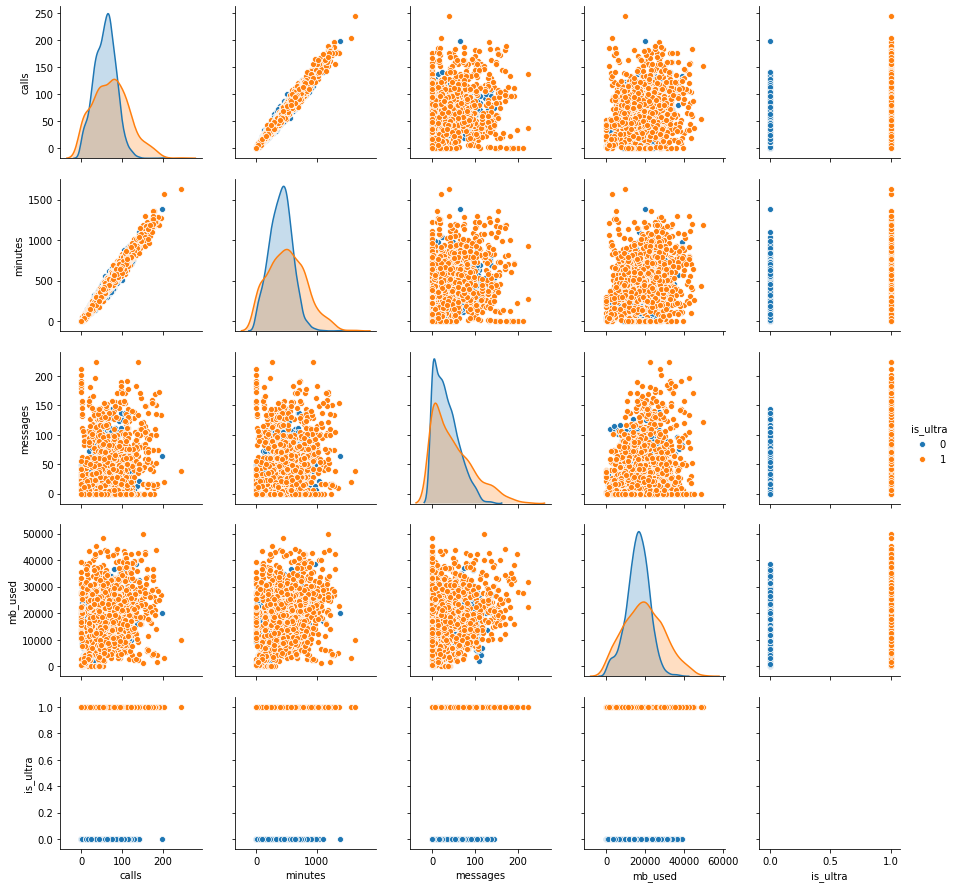

In [14]:
# построим pairplot
sns.pairplot(data, hue='is_ultra')

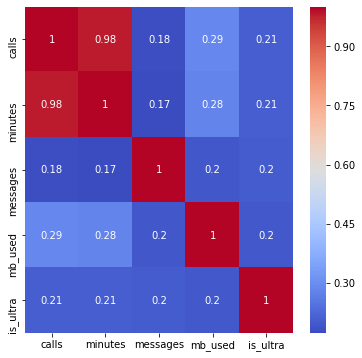

In [15]:
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Разбьем данные на выборки

В данном разделе разобъем все имеющиеся данные на выборки. Для обучения модели, ее тестирования и валидации результатов нам  необходимо 3 выборки: тренировочную, тестовую и валидационную. Делить мы их будем в соотношении 3:1:1 (если говорить в процентах, то 60:20:20). Разобъем данные на выборки.

In [16]:
# создадим тренировочную и тестовую выборки, вторую впоследствии разобъем на тестовую и валидационную
data_train, data_test_valid = train_test_split(data, test_size=0.4, random_state=12345)

In [17]:
# разобъем тренировочную выборку на тестовую и валидационную в соотношении 1:1
data_test, data_valid = train_test_split(data_test_valid, test_size=0.5, random_state=12345)

In [18]:
# проверим совпадает ли сумма размеров тренировочной, тестовойб валидационной выбборок с исходной
print(data.shape[0] == (data_train.shape[0] + data_test.shape[0] + data_valid.shape[0]))

True


После сравнения размеров выборок получили значение True, значит ни одна строчка не потеряна. Можем приступать к обучению модели.

## Исследуем модели

Существует несколько способов обучения модели:

1) решающее дерево
2) случайный лес
3) логическая регрессия

Используем в обучении модели каждуюс различными гиперпараметрами и выберем наиболее нам подходящую

Выделим features и taregt для тренировочной, валидационной и тестовой выборок.

In [19]:
# для тренировочной выборки
features_train = data_train.drop('is_ultra', axis=1)
target_train = data_train['is_ultra']

In [20]:
# для валидационной выборки
features_valid = data_valid.drop('is_ultra', axis=1)
target_valid = data_valid['is_ultra']

In [21]:
# для тестовой выборки
features_test = data_test.drop('is_ultra', axis=1)
target_test = data_test['is_ultra']

### Модель решающее дерево

Рассмотрим модель решающее дерево, изменяя его глубину.

In [22]:
# выведем результаты для тренировочной и валидационной модели с максимальной глубиной дерева от 1 до 8 с шагом 1
best_model = None
best_result = 0
for depth in range(1, 10):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_tree.fit(features_train, target_train)
    predictions_tree = model_tree.predict(features_train)
    result_tree = accuracy_score(target_train, predictions_tree)
    predictions_tree_valid = model_tree.predict(features_valid)
    result_tree_valid = accuracy_score(target_valid, predictions_tree_valid)
    if result_tree > best_result:
        print(f"max_depth = {depth}: тренировочная выборка: {result_tree} --- валидационная выборка: {result_tree_valid}")

max_depth = 1: тренировочная выборка: 0.7577800829875518 --- валидационная выборка: 0.7356143079315708
max_depth = 2: тренировочная выборка: 0.7873443983402489 --- валидационная выборка: 0.7744945567651633
max_depth = 3: тренировочная выборка: 0.8070539419087137 --- валидационная выборка: 0.7791601866251944
max_depth = 4: тренировочная выборка: 0.8101659751037344 --- валидационная выборка: 0.7744945567651633
max_depth = 5: тренировочная выборка: 0.821058091286307 --- валидационная выборка: 0.7776049766718507
max_depth = 6: тренировочная выборка: 0.8397302904564315 --- валидационная выборка: 0.7807153965785381
max_depth = 7: тренировочная выборка: 0.8563278008298755 --- валидационная выборка: 0.7962674961119751
max_depth = 8: тренировочная выборка: 0.8625518672199171 --- валидационная выборка: 0.7869362363919129
max_depth = 9: тренировочная выборка: 0.8827800829875518 --- валидационная выборка: 0.7838258164852255


In [23]:
# выведем результаты для тренировочной и валидационной модели с максимальной глубиной дерева от 1 до 25 с шагом 5
best_model = None
best_result = 0
for depth in range(1, 25, 3):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model_tree.fit(features_train, target_train)
    predictions_tree = model_tree.predict(features_train)
    result_tree = accuracy_score(target_train, predictions_tree)
    predictions_tree_valid = model_tree.predict(features_valid)
    result_tree_valid = accuracy_score(target_valid, predictions_tree_valid)
    if result_tree > best_result:
        print(f"max_depth = {depth}: тренировочная выборка: {result_tree} --- валидационная выборка: {result_tree_valid}")

max_depth = 1: тренировочная выборка: 0.7577800829875518 --- валидационная выборка: 0.7356143079315708
max_depth = 4: тренировочная выборка: 0.8101659751037344 --- валидационная выборка: 0.7744945567651633
max_depth = 7: тренировочная выборка: 0.8563278008298755 --- валидационная выборка: 0.7962674961119751
max_depth = 10: тренировочная выборка: 0.8890041493775933 --- валидационная выборка: 0.7838258164852255
max_depth = 13: тренировочная выборка: 0.9424273858921162 --- валидационная выборка: 0.7682737169517885
max_depth = 16: тренировочная выборка: 0.9808091286307054 --- валидационная выборка: 0.7433903576982893
max_depth = 19: тренировочная выборка: 0.9901452282157677 --- валидационная выборка: 0.7325038880248833
max_depth = 22: тренировочная выборка: 0.9968879668049793 --- валидационная выборка: 0.7387247278382582


В проведенном эксперименте видно, что  в зависимости от того, какую максимальную глубину дерева мы выбираем мы получаем различные значения accuracy. Так, напрмер, по прлученным выше значениям видно, что при максимальной глубине дерева 22 мы достигаем максимальной accuracy для тренировочной модели, но при этом accuracy для валидационной выборки значительно падает. Также видно, что при максимальной глубине дерева 7, мы получаем не очень высокое значение accuracy для тренировочной выборки, но при этом данное значение для тренирововочной выборки максимальное, далее на следующем шаге при максимальной глубине дерева от 8 выше наблюдается рост accuracy для тренировочной выборки и падение данного показателя для валидационной выборки. Это говорит о переученности модели.

Рассмотрим следующую модель.

### Модель случайный лес

Рассмотрим моедль случайный лес, изменяя количество деревьев в лесу. При этом нужно помнить, что точность пердсказания и соответсвенно кажество модели выше, но при этом затрачивается больше времени на обработку и обучение модели, и чем больше строк, тем медленнее будет работать данный метод.

In [24]:
# количество деревьев в лесу от 1 до 11
best_model_forest = None
best_result_forest = 0
for est in range(1, 11):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_train, target_train)
    result_forest_train = model_forest.score(features_train, target_train)
    result_forest_valid = model_forest.score(features_valid, target_valid)
    if result_tree > best_result:
        print(f"est = {est}: тренировочная выборка: {result_forest_train} --- валидационная выборка: {result_forest_valid}")

est = 1: тренировочная выборка: 0.9035269709543569 --- валидационная выборка: 0.7216174183514774
est = 2: тренировочная выборка: 0.9071576763485477 --- валидационная выборка: 0.7589424572317263
est = 3: тренировочная выборка: 0.9491701244813278 --- валидационная выборка: 0.7667185069984448
est = 4: тренировочная выборка: 0.9408713692946058 --- валидационная выборка: 0.7776049766718507
est = 5: тренировочная выборка: 0.9704356846473029 --- валидационная выборка: 0.7729393468118196
est = 6: тренировочная выборка: 0.9631742738589212 --- валидационная выборка: 0.776049766718507
est = 7: тренировочная выборка: 0.9823651452282157 --- валидационная выборка: 0.7822706065318819
est = 8: тренировочная выборка: 0.9766597510373444 --- валидационная выборка: 0.7853810264385692
est = 9: тренировочная выборка: 0.9870331950207469 --- валидационная выборка: 0.7822706065318819
est = 10: тренировочная выборка: 0.9849585062240664 --- валидационная выборка: 0.7900466562986003


In [25]:
# количество деревьев в лесу от 1 до 50
best_model_forest = None
best_result_forest = 0
for est in range(1, 50, 3):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(features_train, target_train)
    result_forest_train = model_forest.score(features_train, target_train)
    result_forest_valid = model_forest.score(features_valid, target_valid)
    if result_tree > best_result:
        print(f"est = {est}: тренировочная выборка: {result_forest_train} --- валидационная выборка: {result_forest_valid}")

est = 1: тренировочная выборка: 0.9035269709543569 --- валидационная выборка: 0.7216174183514774
est = 4: тренировочная выборка: 0.9408713692946058 --- валидационная выборка: 0.7776049766718507
est = 7: тренировочная выборка: 0.9823651452282157 --- валидационная выборка: 0.7822706065318819
est = 10: тренировочная выборка: 0.9849585062240664 --- валидационная выборка: 0.7900466562986003
est = 13: тренировочная выборка: 0.9896265560165975 --- валидационная выборка: 0.7947122861586314
est = 16: тренировочная выборка: 0.9885892116182573 --- валидационная выборка: 0.7900466562986003
est = 19: тренировочная выборка: 0.9927385892116183 --- валидационная выборка: 0.7962674961119751
est = 22: тренировочная выборка: 0.9927385892116183 --- валидационная выборка: 0.7947122861586314
est = 25: тренировочная выборка: 0.9953319502074689 --- валидационная выборка: 0.7884914463452566
est = 28: тренировочная выборка: 0.9963692946058091 --- валидационная выборка: 0.7947122861586314
est = 31: тренировочная

В проведенном эксперименте получили: небольше количесвто деревьев в лесу при объеме строк до 2000 обрабатывается достаточно быстро, при этом по сравнению с предыдущей моделью качество обучения выше. При этом видно, что при количестве деревьев в лесу около 37 мы имеем самые максимальные значения по валидационной выборке, дпльше показатели точности предсказания начинают падать. При этом в данном опыте максимальное значение по валидационно выборке не значительно, но тем не менее выше, чем при использовании модели дерево решения. Также в ходе выполнения данной задачи, когда количество деревьев начало измеряться десятками, программа немного подвисала при выполнении кода. Об этом говорилось выше, точность предская высокая, но скорость выполнения медленная.

Перейдем к еще одной модели.

### Логическая регрессия

Данный вид модели является достаточно инересным. Это свяано с тем, что в отличе от двух предыущих можелей, здесь нет большого колчиества настраиваемых гиперпараметров, но при этом данная модель имеет хорошую точность выполнения предсказания, а также высокую скорость выполнения. Рассмотрим данную модель.

In [26]:
model_regrassion = LogisticRegression(random_state=12345)
model_regrassion.fit(features_train, target_train)
result_regrassion = model_regrassion.score(features_valid, target_valid)
print(f"Accuracy модели логической регрессии на валидационной выборке: {result_regrassion}")

Accuracy модели логической регрессии на валидационной выборке: 0.7278382581648523


Данный метод оказался неубедительным, так как на предыдущих двух моделях accuracy на валидационной выборке были выше. Проверим эти модели с тестовой выборкой.

### Вывод

В данном раздели мы расмотрели 3 модели обучения:

1) дерево решения
2) случайный лес
3) логическая регрессия

Получили представления, как изменнения гиперпараметров могу влиятьь на точность предсказания. Так для решающего дерева на наших данных оптимальной глубиной является 7, для случайного леса количество деревьев - 37. Наихудшие результаты получили для логической регрессии.

Посмотрим поведение каждой модели для тестовой выборки.

## Проверим модель на тестовой выборке

По условию задания нам нужно достичь accuracy более 0.75

### Проверка модели решающее дерево

In [27]:
# проверим модель решающее дерево на тестовой выборке
model_tree = DecisionTreeClassifier(random_state=12345, max_depth = 7)
model_tree.fit(features_train, target_train)
predictions_tree_test = model_tree.predict(features_test)
result_tree_test = accuracy_score(target_test, predictions_tree_test)
print(f"Accuracy лучшей модели: {result_tree_test}")

Accuracy лучшей модели: 0.7822706065318819


В данной модели наше accuracy составило 0.78, что соответствует условию задачи. 

### Проверка модели случайный лес

In [28]:
# количество деревьев в лесу 37
model_forest = RandomForestClassifier(random_state=12345, n_estimators=37)
model_forest.fit(features_train, target_train)
result_forest_test = model_forest.score(features_test, target_test)
print(f"Accuracy лучшей модели: {result_forest_test}")

Accuracy лучшей модели: 0.7962674961119751


В данной модели мы получили accuracy равное 0.79. Данное значение выше, чем в решающем дереве, но при этом данная модель немного подвисла, при расчетах, рпи том, что количество строк было 643.

### Проверка модели логическая регрессия

In [29]:
model_regrassion = LogisticRegression(random_state=12345)
model_regrassion.fit(features_train, target_train)
result_regrassion_test = model_regrassion.score(features_test, target_test)
print(f"Accuracy модели логической регрессии на тестовой выборке: {result_regrassion_test}")

Accuracy модели логической регрессии на тестовой выборке: 0.7511664074650077


В целом в данной модели нам тоже удалось достичь поставленного уровня accuracy, но на валидационной выборке данная моедль себя показа плохо.

### Вывод

В ходе проверки трех моделей на тестовой выборке, все три модели показали accuracy, превышающий заданный, но модель логической регрессии очень плохо показала себя на валидационной выборке.

Поэтому выбирая между двумя моделями: решающее дерево и случайный лес, выбор модели обучения зависит от оюъем датасета. Если объем небольшой, то лучше выбрать случайный лес, так как точность там выше, но скорость выполнения ниже. Но если объем данных большой, то можно использовать и решающее дерево

## (бонус) Проверим модели на адекватность

Для решения данной задачи импортируем DummyClassifier - модуль, который для прогнозов использует простые правила.

In [30]:
data_dummy = DummyClassifier(strategy='most_frequent', random_state=12345)

In [31]:
# обучаем модель
data_dummy.fit(features_train, target_train)
# доля правильных ответов
result_data_dammy_valid = data_dummy.score(features_valid, target_valid)
result_data_dammy_test = data_dummy.score(features_test, target_test)
print(f"Доля правильных ответов валидационная выборка: {result_data_dammy_valid}")
print(f"Доля правильных ответов тестовая выборка: {result_data_dammy_test}")

Доля правильных ответов валидационная выборка: 0.6842923794712286
Доля правильных ответов тестовая выборка: 0.7060653188180405


Полученные результаты accuracy для валидационной и тестовой выборки модели, построенной DummyClassifier ниже, чем для нашей модели, соответственно, можно сделать вывод о том, что наша модель адеквартная.

## Общий вывод

В ходе проверки трех моделей на тестовой выборке, все три модели показали accuracy, превышающий заданный, но модель логической регрессии очень плохо показала себя на валидационной выборке.

Поэтому выбирая между двумя моделями: решающее дерево и случайный лес, выбор модели обучения зависит от оюъем датасета. Если объем небольшой, то лучше выбрать случайный лес, так как точность там выше, но скорость выполнения ниже. Но если объем данных большой, то можно использовать и решающее дерево.

При исследовании модели на адекватность, мы выяснили, что модель адекваная.